Dalam studi kasus ini, kita dipekerjakan sebagai konsultan atau tim ilmuwan data pada suatu bank. Bank tersebut memiliki data nasabah terkait dengan perilaku nasabah dalam menggunakan kartu kredit. Tim pemasaran pada bank tersebut ingin meluncurkan kampanye pemasaran iklan bertarget. Sebagai data scientist kita akan membantu tim pemasaran dengan melakukan segmentasi pasar yaitu membagi nasabah kedalam beberapa kelompok sehingga kampanye pemasaran iklan akan disesuaikan dengan kelompok nasabah tersebut.  

---

In this case study, we are hired as a consultant or a team of data scientists at a bank. The bank has customer data related to customer behavior in using credit cards. The marketing team at the bank wanted to launch a targeted advertising marketing campaign. As data scientists, we will help the marketing team by segmenting the market (market segmentation), namely dividing customers into several groups so that the advertising marketing campaign will be tailored to that customer group.

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# I get RecursionError
import sys
sys.setrecursionlimit(10**6)

In [3]:
# load dataset
customers_df = pd.read_csv("/work/customers-segmentation-marketing-department/Marketing_data.csv")
customers_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Columns descriptions:
- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [5]:
# get the summary of data
customers_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Who made one off purchase of $40761.25? (maximum value one-off purchase)

In [6]:
customers_df[customers_df['ONEOFF_PURCHASES'] == customers_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


the balance, purchases, and oneoff purchases pretty high and frequent. However, cash advance is relatively small and only occurs once.
So that for these customers we can target marketing ads in the form of cash advance service ads (just for example)

##### Who made cash advance of $47137? (maximum value of cash advance)

In [7]:
customers_df[customers_df['CASH_ADVANCE'] == customers_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize and Explore Dataset

<AxesSubplot:>

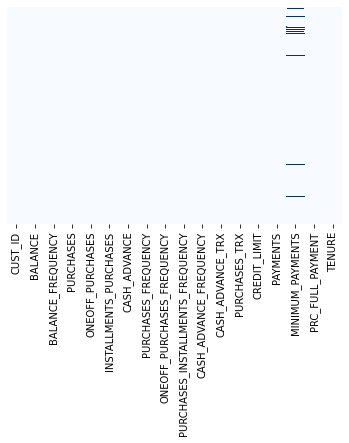

In [8]:
# any missing value?
# visualize the missing value of data
sns.heatmap(customers_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [9]:
# more detail
customers_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# fill up the missing value in each column with the median or mean
customers_df['CREDIT_LIMIT'].fillna(value=customers_df['CREDIT_LIMIT'].median(), inplace=True)
customers_df['MINIMUM_PAYMENTS'].fillna(value=customers_df['MINIMUM_PAYMENTS'].median(), inplace=True)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


<AxesSubplot:>

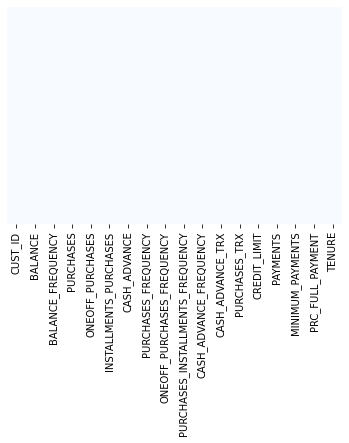

In [11]:
print(customers_df.isnull().sum())
sns.heatmap(customers_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [12]:
# Let's drop Customer ID since it has no meaning here 
customers_df.drop('CUST_ID', axis=1, inplace=True)

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

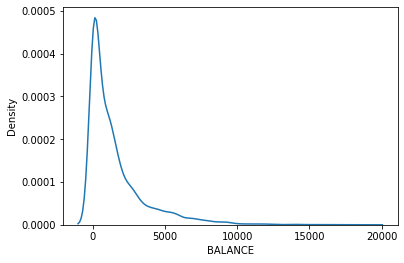

In [13]:
sns.kdeplot(data=customers_df, x='BALANCE')

<AxesSubplot:xlabel='PURCHASES', ylabel='Density'>

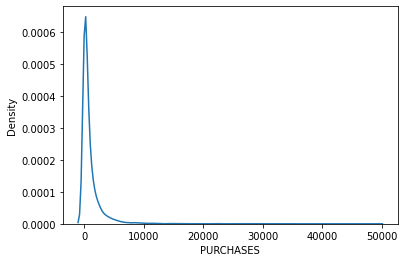

In [14]:
sns.kdeplot(data=customers_df, x='PURCHASES')

<AxesSubplot:xlabel='ONEOFF_PURCHASES', ylabel='Density'>

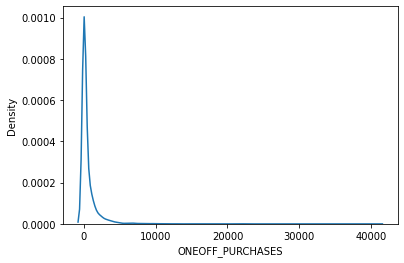

In [15]:
sns.kdeplot(data=customers_df, x='ONEOFF_PURCHASES')

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES', ylabel='Density'>

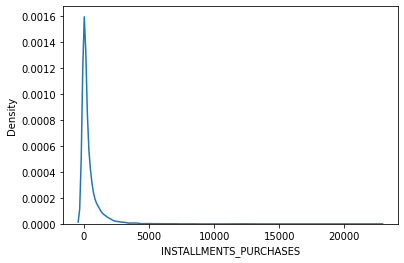

In [16]:
sns.kdeplot(data=customers_df, x='INSTALLMENTS_PURCHASES')

<AxesSubplot:xlabel='CASH_ADVANCE', ylabel='Density'>

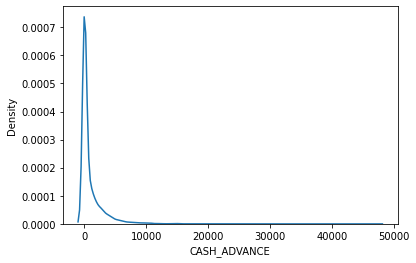

In [17]:
sns.kdeplot(data=customers_df, x='CASH_ADVANCE')

[Text(0, 0, 'BALANCE'),
 Text(1, 0, 'BALANCE_FREQUENCY'),
 Text(2, 0, 'PURCHASES'),
 Text(3, 0, 'ONEOFF_PURCHASES'),
 Text(4, 0, 'INSTALLMENTS_PURCHASES'),
 Text(5, 0, 'CASH_ADVANCE'),
 Text(6, 0, 'PURCHASES_FREQUENCY'),
 Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(10, 0, 'CASH_ADVANCE_TRX'),
 Text(11, 0, 'PURCHASES_TRX'),
 Text(12, 0, 'CREDIT_LIMIT'),
 Text(13, 0, 'PAYMENTS'),
 Text(14, 0, 'MINIMUM_PAYMENTS'),
 Text(15, 0, 'PRC_FULL_PAYMENT'),
 Text(16, 0, 'TENURE')]

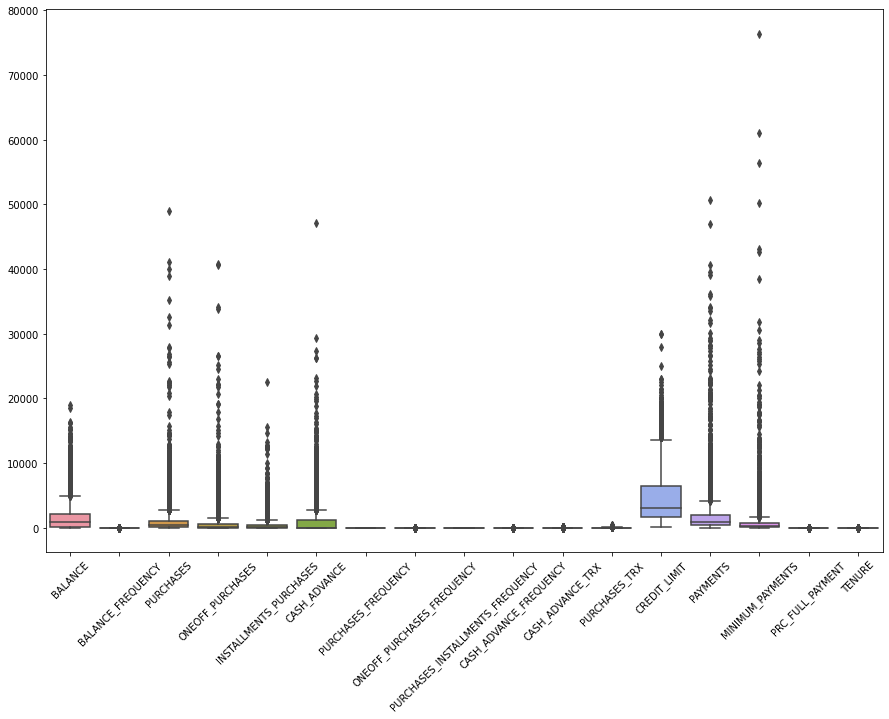

In [18]:
plt.figure(figsize=(15, 10))
g = sns.boxplot(data=customers_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

<AxesSubplot:>

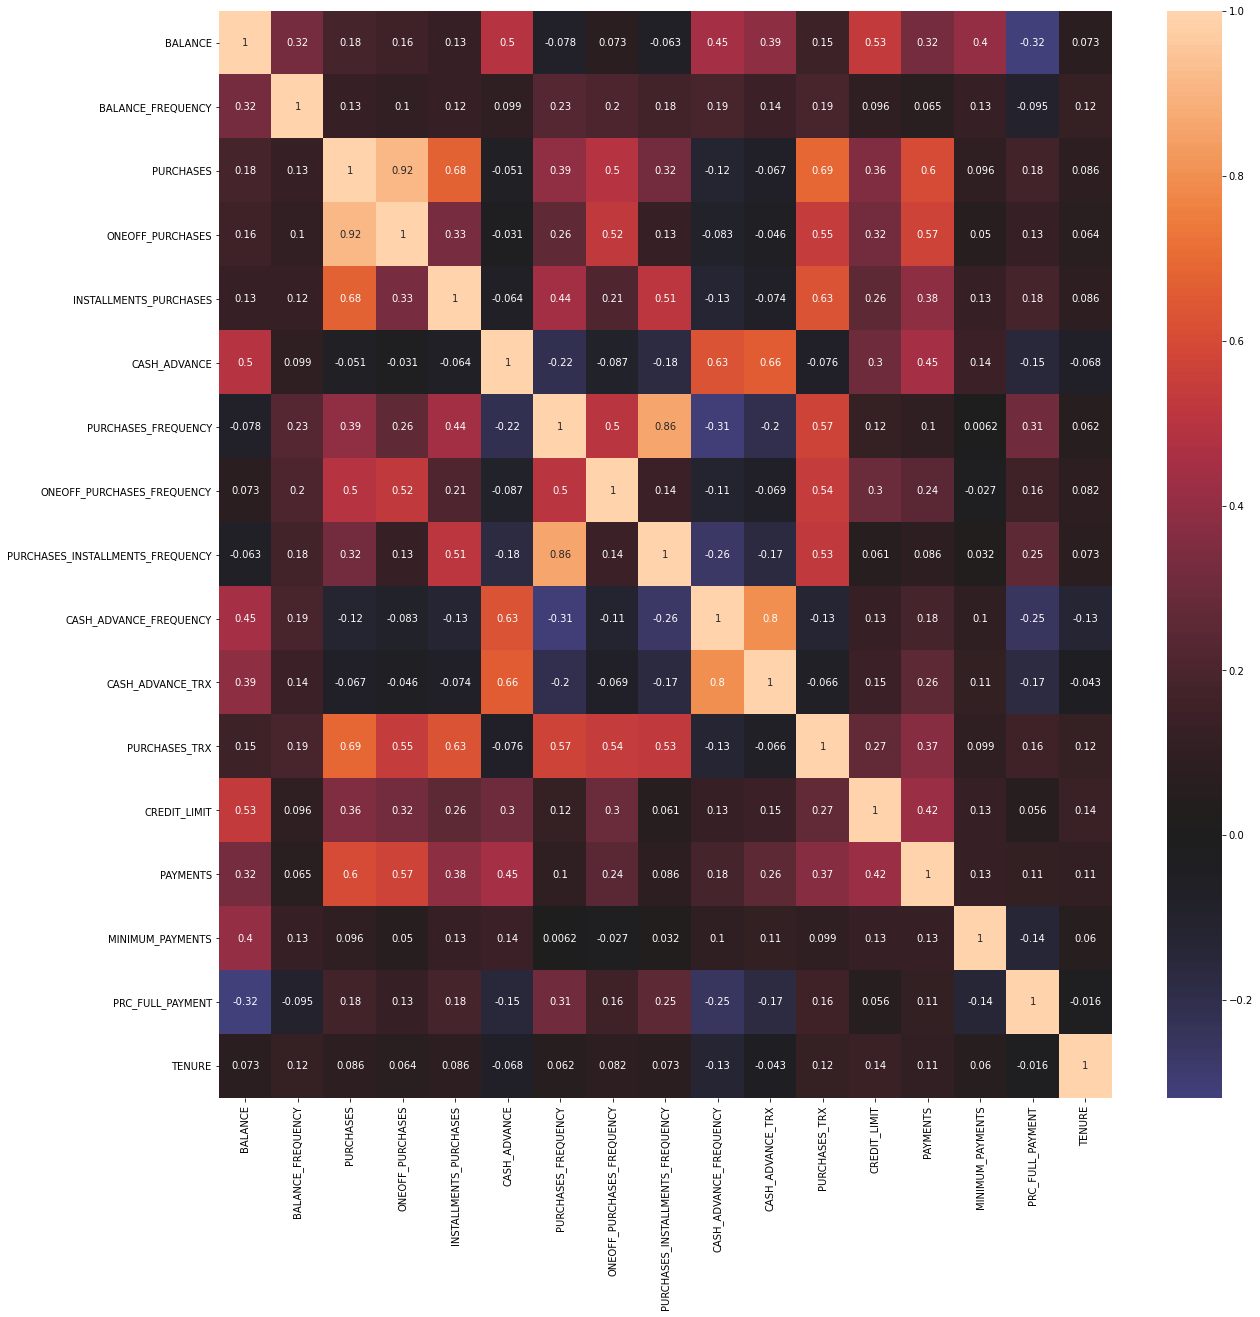

In [19]:
# let's look at the correlation between features
correlations = customers_df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, center=0)

## Find The Optimal Number of Clusters Using Elbow Method

In [20]:
# scale the data
# because we will use the k-means algorithm,
# use PowerTransform scaler,
# because some features have outliers

pt = PowerTransformer()

In [21]:
customers_df_scaled = pt.fit_transform(customers_df)

Within Cluster Sum of Squares (WCSS) is score used in the elbow method. We can get the value of wcss in the trained kmeans model in ```inertia_``` attribute .

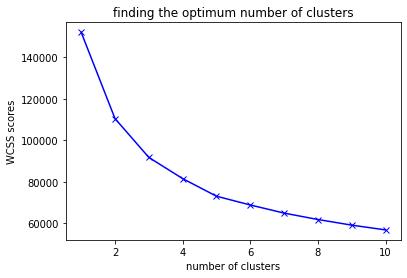

In [22]:
# visualize the wcss score for each K number of clusters
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.title("finding the optimum number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS scores")
plt.show()

## Apply K-means Method

In [23]:
# choose number of cluster to be 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_df_scaled)
labels = kmeans.labels_

In [24]:
# cluster centers dataframe
kmeans.cluster_centers_.shape

(4, 17)

In [25]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=[customers_df.columns])

In [26]:
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.777041,0.424658,0.638318,0.586121,0.458762,1.053773,0.560804,0.580962,0.412600,1.015840,1.049172,0.660620,0.309023,0.513282,0.694672,-0.330251,0.017633
1,0.438237,0.057908,-1.251037,-0.732008,-1.032533,0.988849,-1.192246,-0.727313,-0.976363,0.924091,0.940468,-1.233720,-0.132347,-0.071288,0.271664,-0.394617,-0.176384
2,-0.960317,-0.610244,0.082071,-0.419407,0.307454,-0.889066,0.193666,-0.492052,0.336685,-0.841118,-0.861438,0.073886,-0.393591,-0.594186,-0.700576,0.358918,-0.054071
3,0.099012,0.393476,0.955720,1.004844,0.527985,-0.901651,0.796801,1.098313,0.455686,-0.853602,-0.873702,0.927214,0.438543,0.464347,0.031721,0.283318,0.277835


In [27]:
# perform inverse transformation
# to get unscaled data

cluster_centers = pt.inverse_transform(cluster_centers_df)
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=[customers_df.columns])
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2228.555520,0.985383,969.575862,127.736144,120.183554,1086.053386,0.688570,0.193902,0.397228,0.221965,4.036291,15.364539,4289.097694,1780.245746,816.741747,0.021661,11.903544
1,1370.949589,0.956029,2.921395,1.073924,0.182372,799.592270,0.026935,0.015286,0.005397,0.201208,3.314130,0.229399,2993.372683,848.748059,491.788014,0.017369,11.851999
2,89.526525,0.887506,301.810357,4.056631,75.372546,0.158793,0.530544,0.037837,0.366579,0.002682,0.022732,6.271665,2411.217982,392.410855,160.271013,0.079102,11.884943
3,800.257699,0.983051,1723.659905,609.528643,148.595518,0.120507,0.796007,0.344236,0.415344,0.001882,0.016362,22.724760,4760.234163,1680.010546,370.844136,0.071479,11.967102


In [28]:
# concatenate the clusters labels to our original dataframe
customers_df_clusters = pd.concat([customers_df, pd.DataFrame({'cluster': labels})], axis=1)
customers_df_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


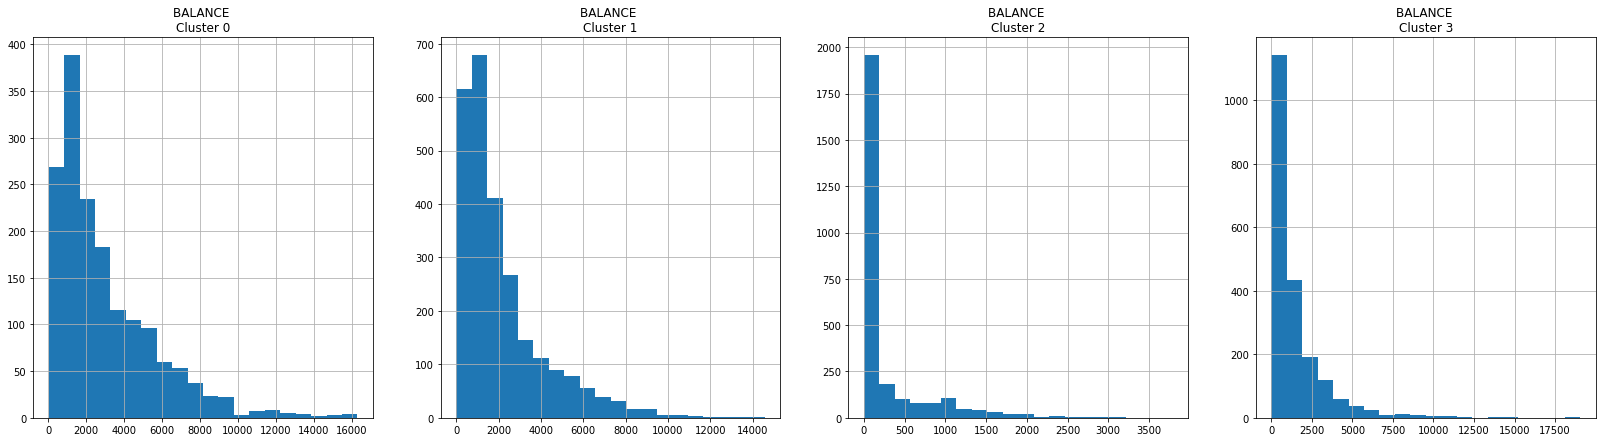

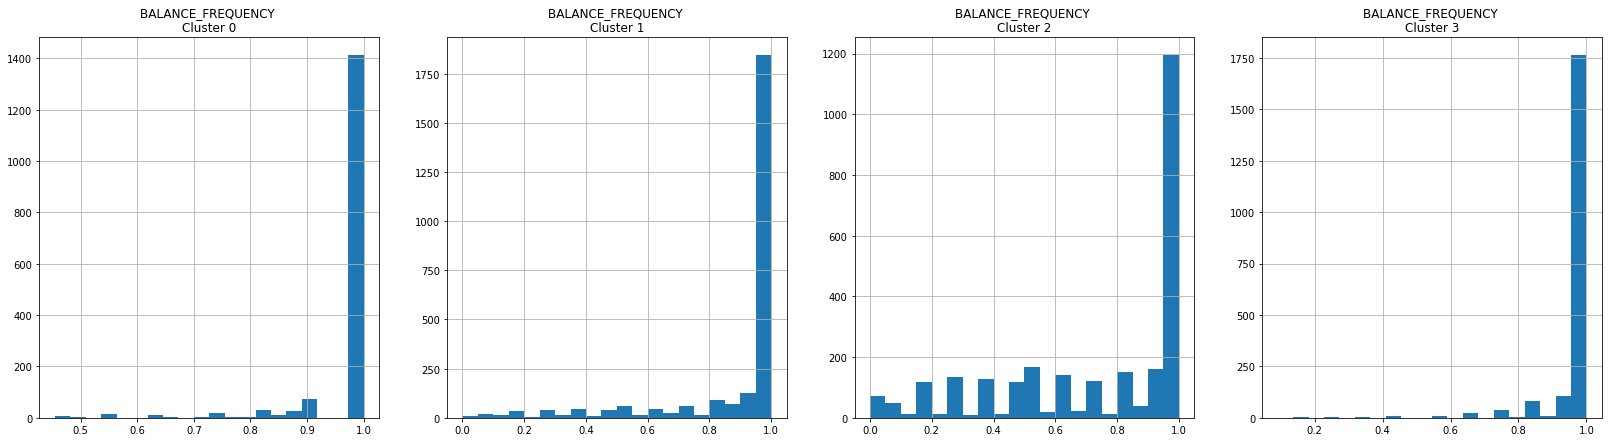

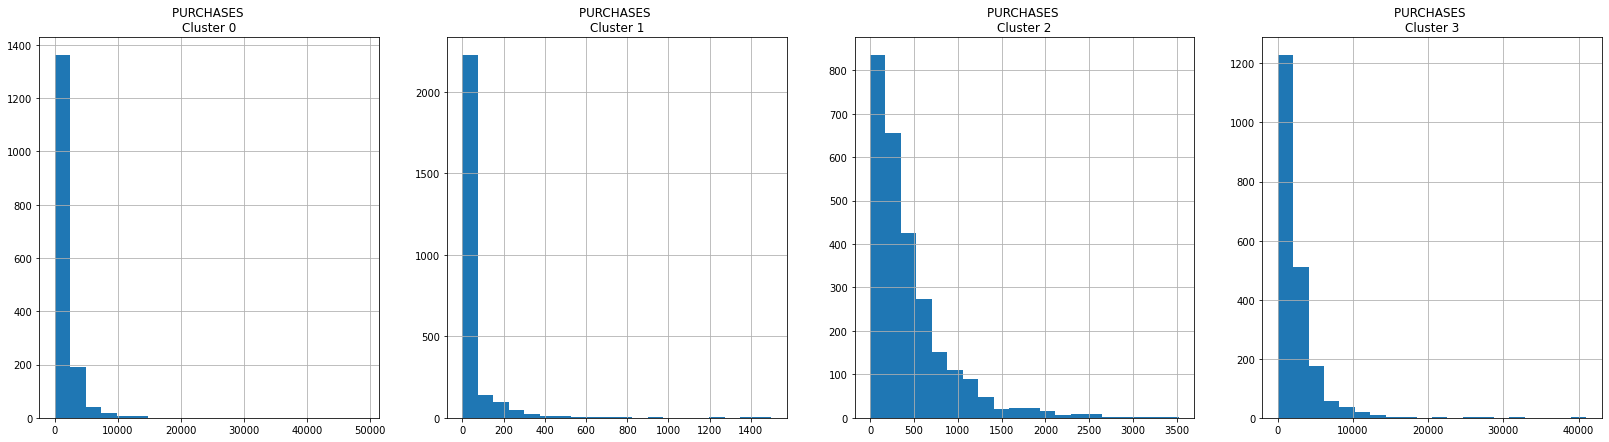

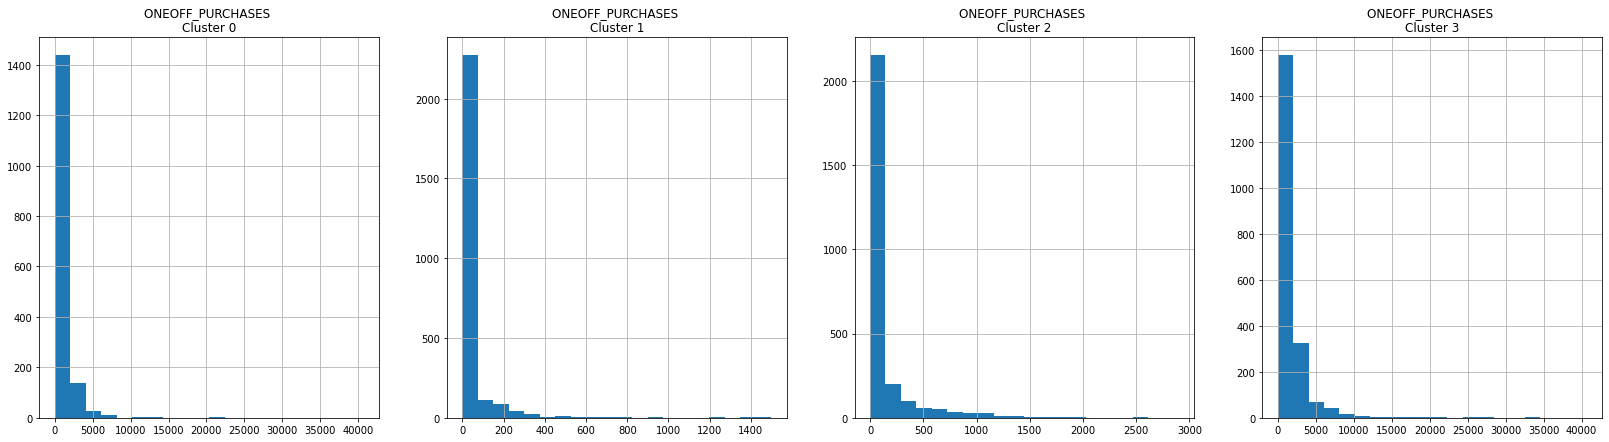

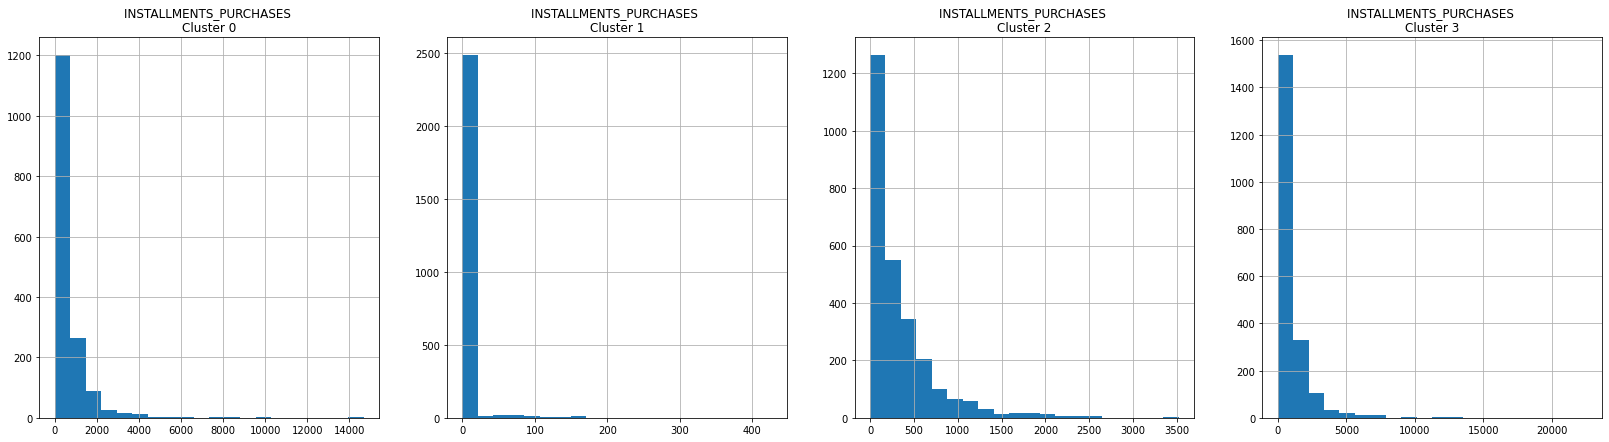

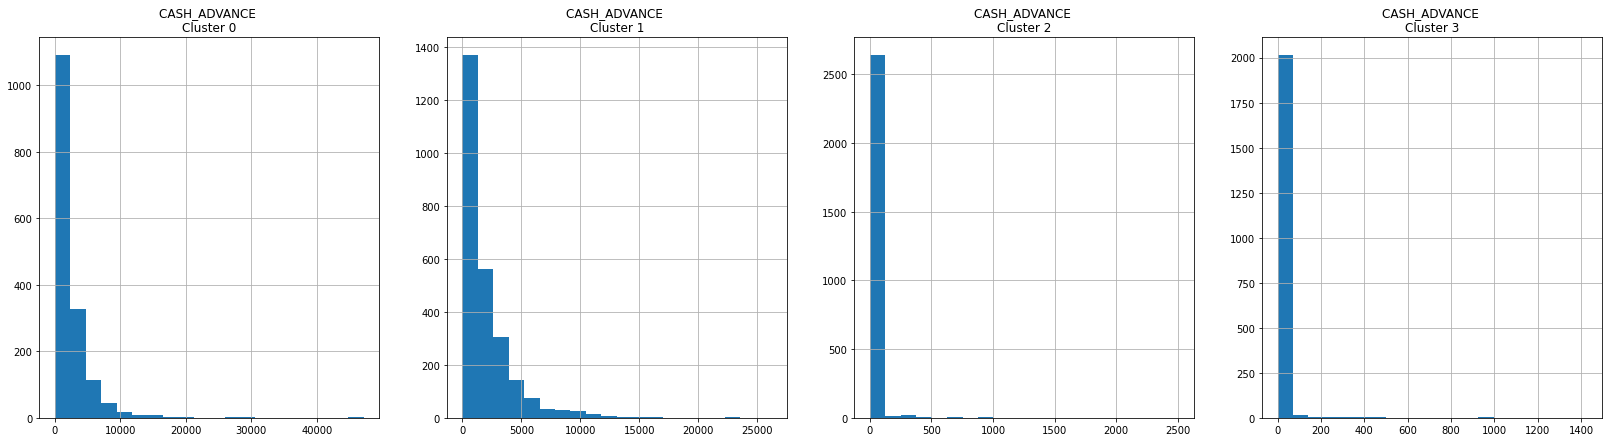

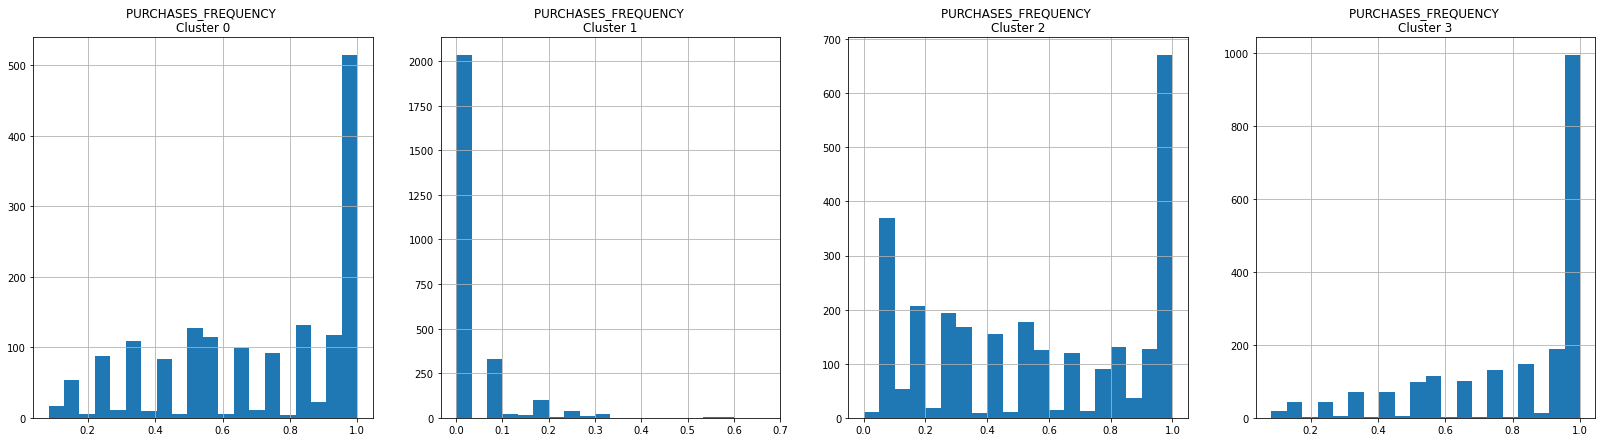

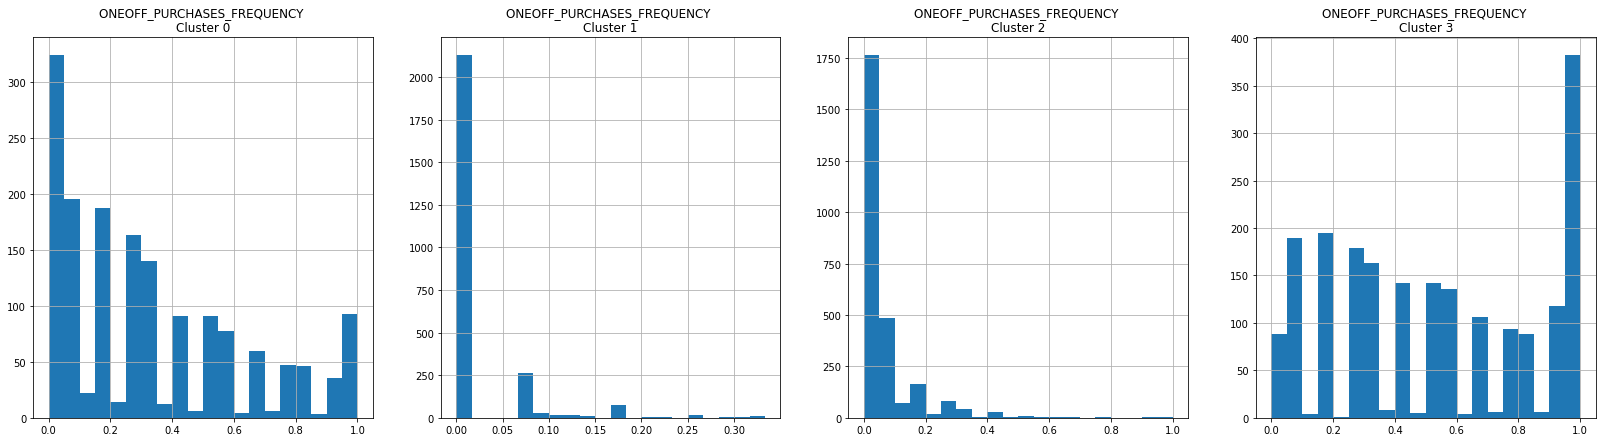

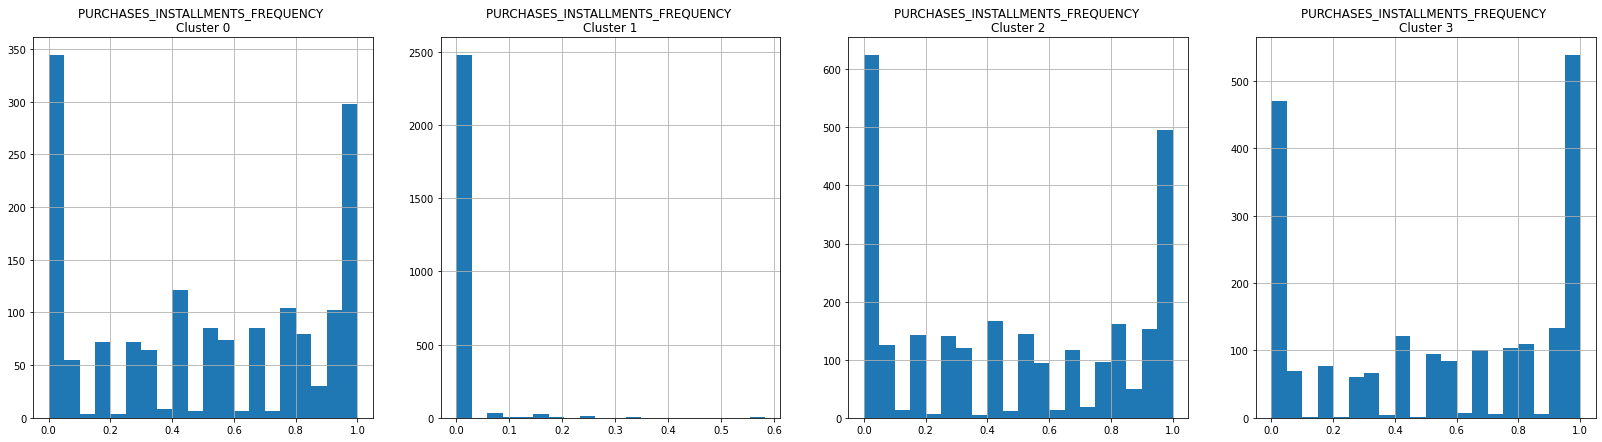

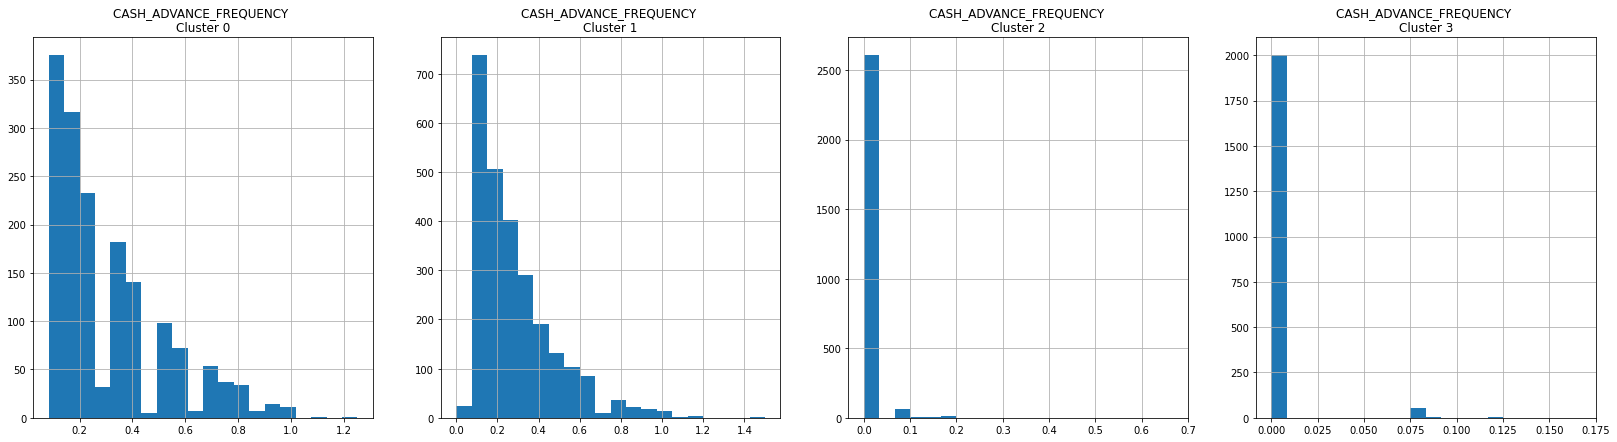

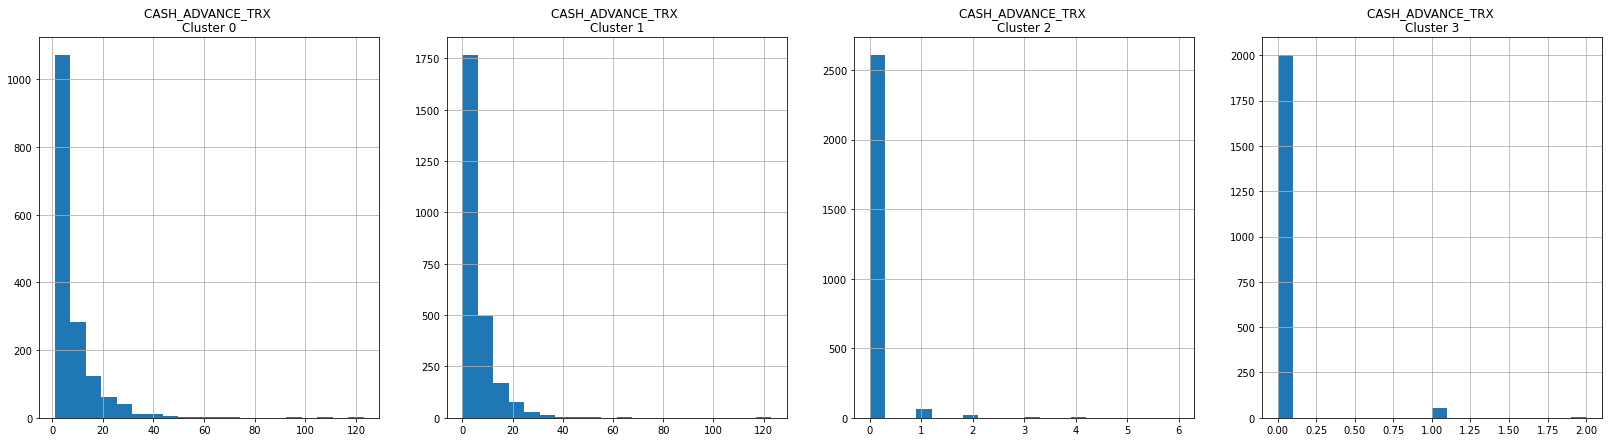

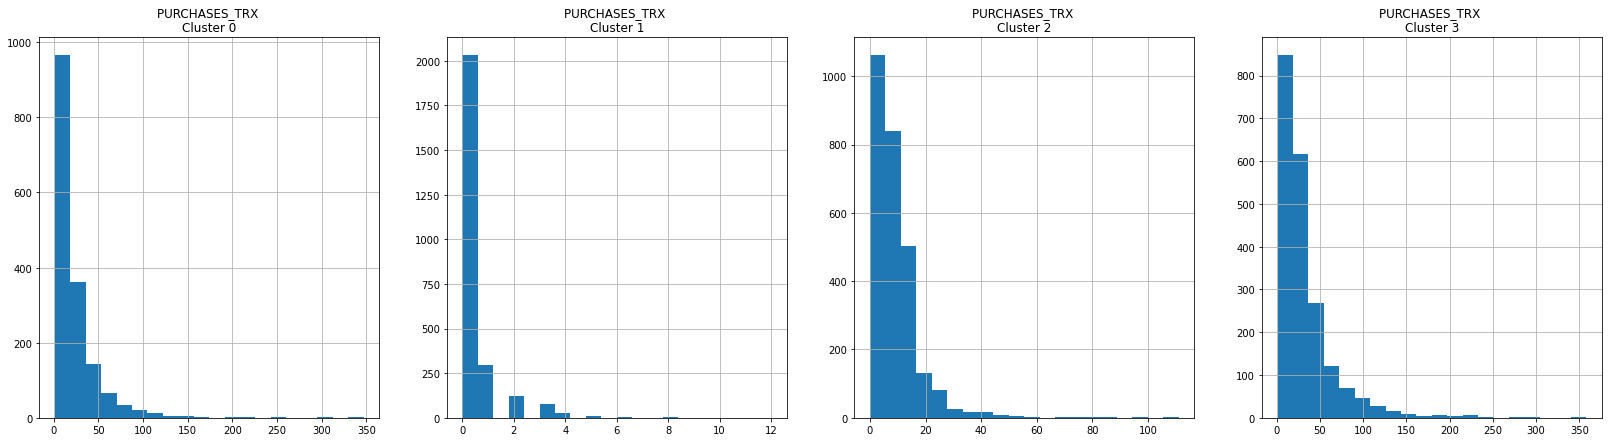

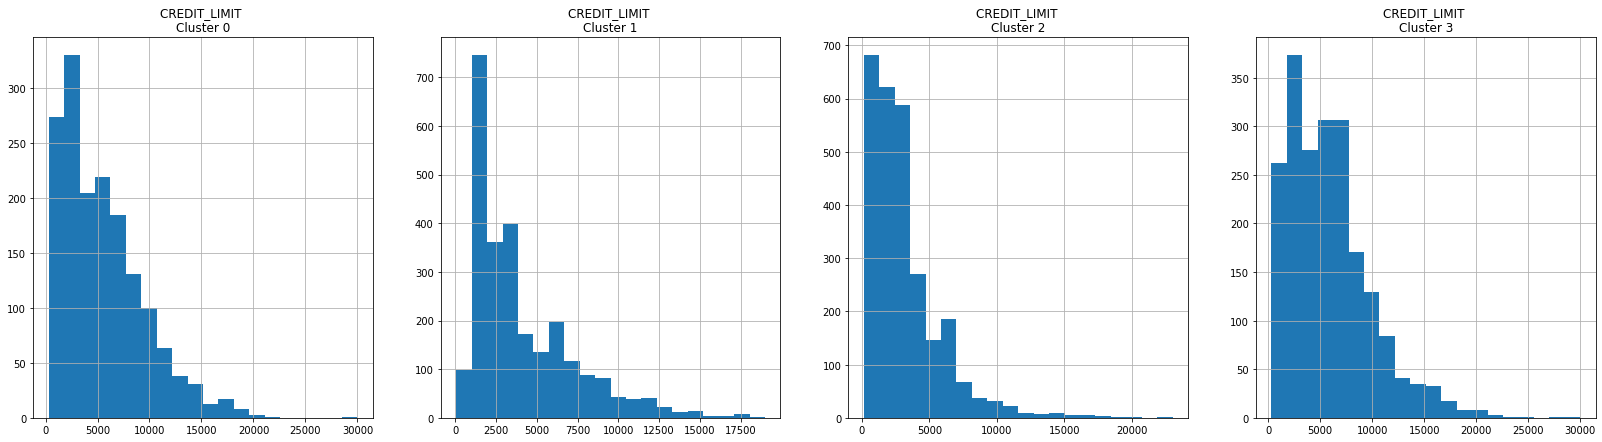

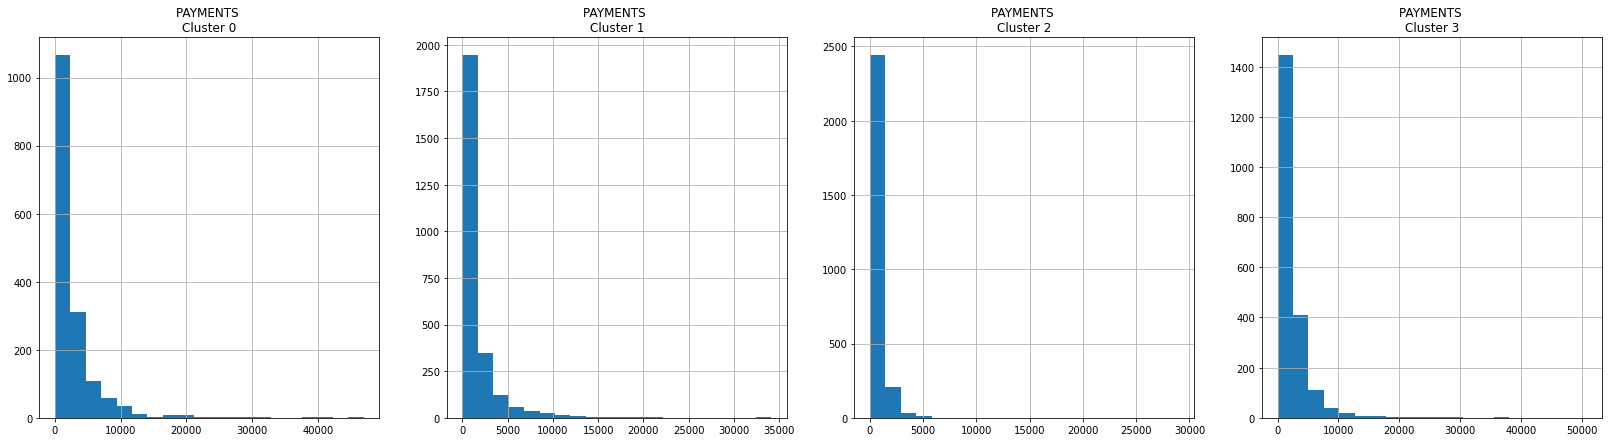

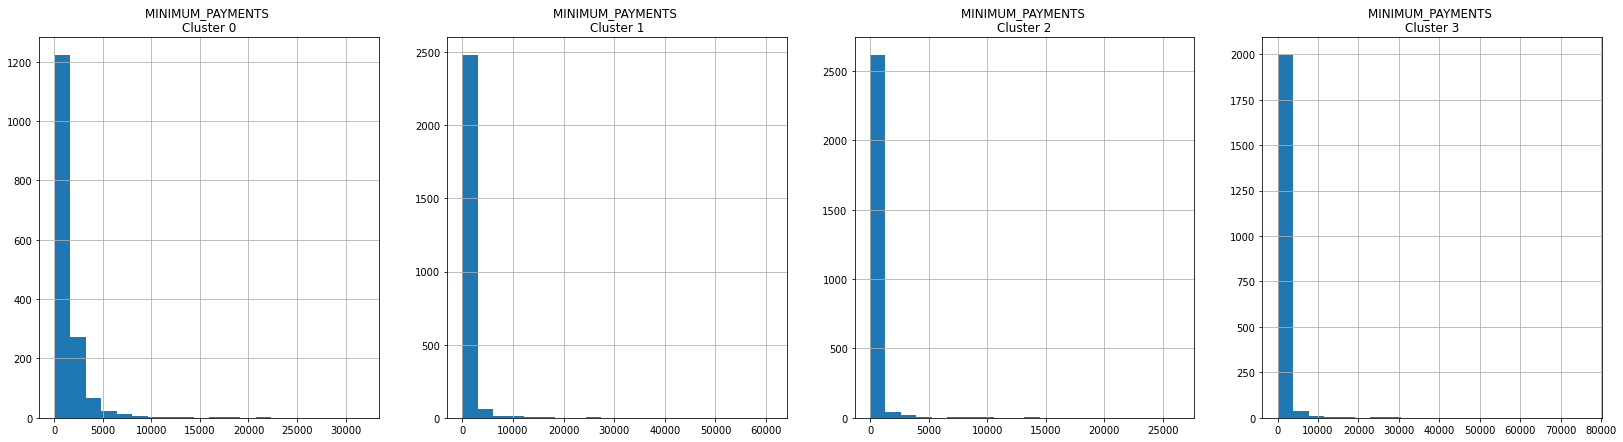

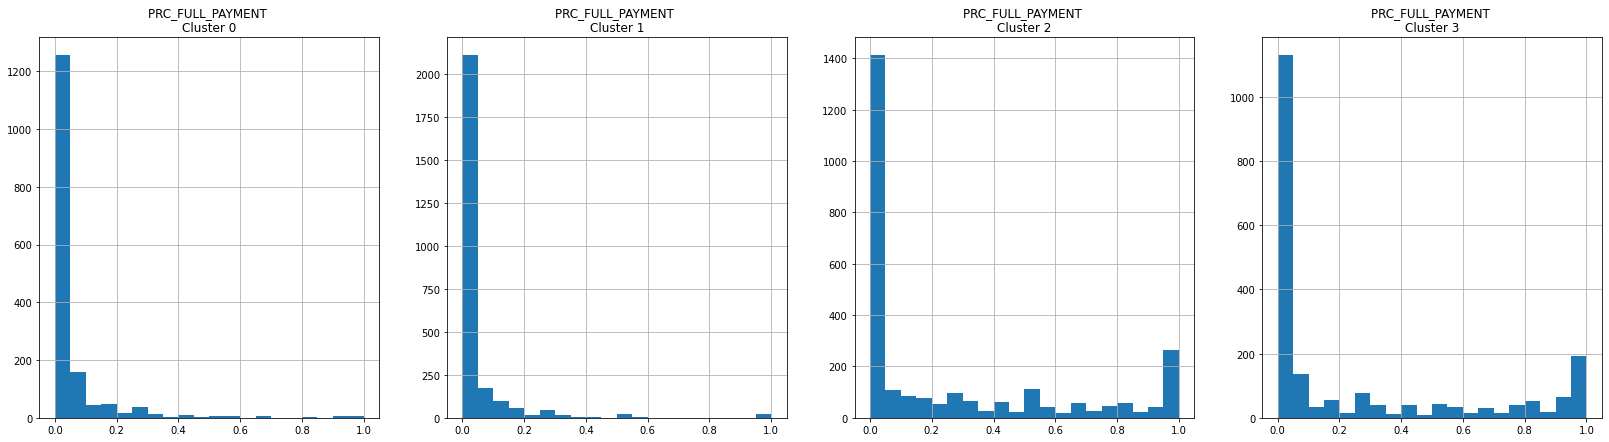

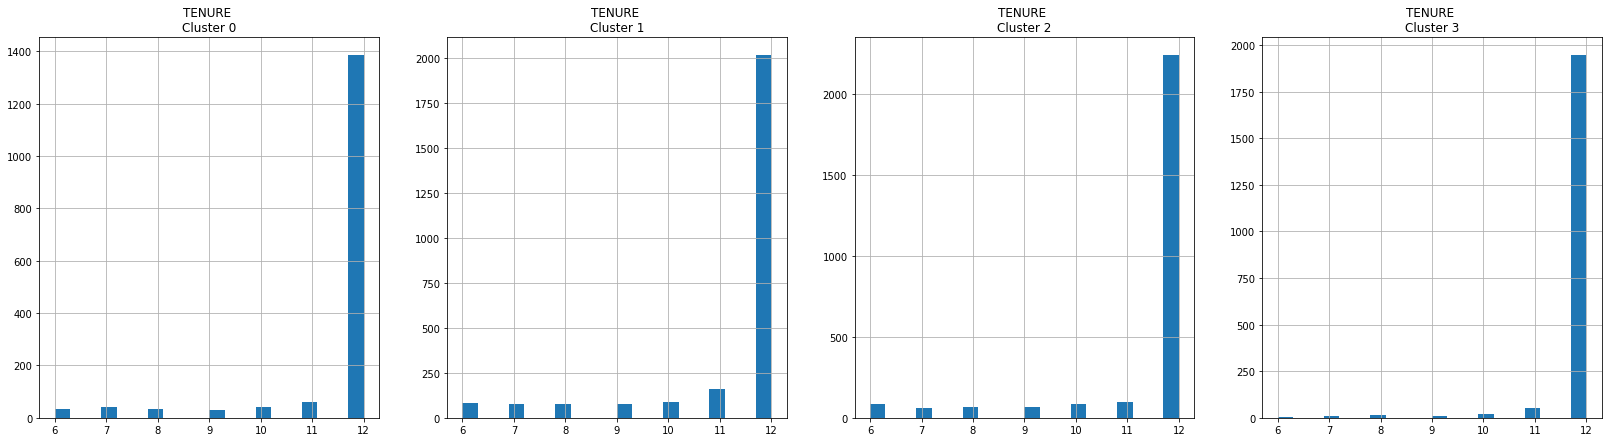

In [29]:
# Plot the histogram of various clusters
# using built-in pandas plot

for col in customers_df.columns:
  plt.figure(figsize=(28, 7))
  for i in range(4): # number of clusters
    plt.subplot(1, 4, i+1)
    cluster = customers_df_clusters[customers_df_clusters['cluster'] == i]
    cluster[col].hist(bins=20)
    plt.title(f"{col} \nCluster {i}")

plt.show()

## Apply Pricipcal Component Analysis (PCA) and Visualize the Results

In [30]:
# obtain princapl component
# number of components is 2
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(customers_df_scaled)
principal_comp_df = pd.DataFrame(principal_comp, columns=['principal_component_1', 'principal_component_2'])
principal_comp_df

,principal_component_1,principal_component_2
0,-0.257577,-3.116032
1,-3.479101,0.878000
2,1.338181,1.187460
3,-1.374088,-0.532106
4,-1.009729,-1.404850
...,...,...
8945,1.861607,-3.007266
8946,1.295293,-2.133454
8947,1.280434,-3.657925
8948,-2.812076,-3.914620


In [31]:
# concatenate with clusters label
pc_df_clusters = pd.concat([principal_comp_df, pd.DataFrame({'cluster': labels})], axis=1)
pc_df_clusters

,principal_component_1,principal_component_2,cluster
0,-0.257577,-3.116032,2
1,-3.479101,0.878000,1
2,1.338181,1.187460,3
3,-1.374088,-0.532106,1
4,-1.009729,-1.404850,2
...,...,...,...
8945,1.861607,-3.007266,2
8946,1.295293,-2.133454,2
8947,1.280434,-3.657925,2
8948,-2.812076,-3.914620,1


[Text(0.5, 0, 'Principal Component 1'), Text(0, 0.5, 'Principal Component 2')]

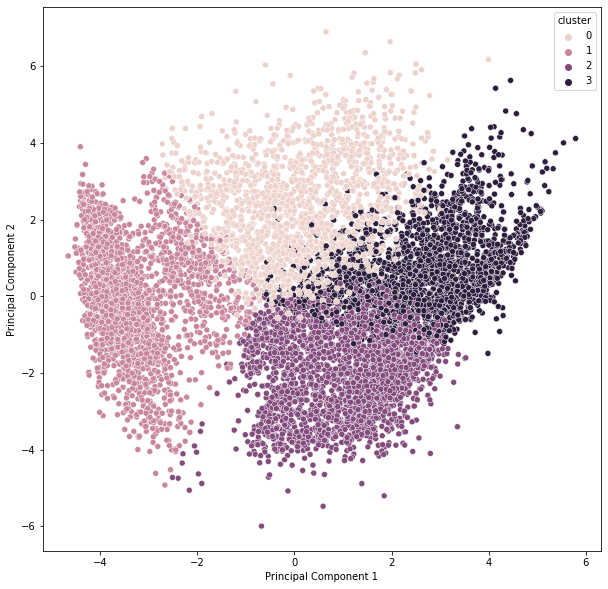

In [32]:
# visualize the principal components and labels
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=pc_df_clusters, hue='cluster', x='principal_component_1', y='principal_component_2')
ax.set(xlabel="Principal Component 1", ylabel="Principal Component 2")

In [33]:
pca.explained_variance_ratio_

array([0.35751427, 0.22517574])

But the two components above only represent about 60% of the information.

## Apply Dimensionality Reduction with Autoencoders

In [34]:
# import libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

In [35]:
# build the network
# we're going to reduce the dimension to 10
# set the bottleneck layer to 10 neurons

input_df = Input(shape=(17,))

# encoded = Dense(7, activation='relu')(input_df)
encoded = Dense(512, activation='relu', kernel_initializer='glorot_uniform')(input_df)
encoded = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(encoded)
encoded = Dense(128, activation='relu', kernel_initializer='glorot_uniform')(encoded)
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(encoded) # the bottleneck

decoded = Dense(128, activation='relu', kernel_initializer='glorot_uniform')(encoded)
decoded = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(decoded)
decoded = Dense(512, activation='relu', kernel_initializer='glorot_uniform')(decoded)
decoded = Dense(17, kernel_initializer='glorot_uniform')(decoded)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
autoencoder.fit(customers_df_scaled, customers_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 1s 8ms/step - loss: 0.5285
Epoch 2/25
70/70 [==============================] - 1s 8ms/step - loss: 0.1155
Epoch 3/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0544
Epoch 4/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0385
Epoch 5/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0316
Epoch 6/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0257
Epoch 7/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0217
Epoch 8/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0187
Epoch 9/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0156
Epoch 10/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0138
Epoch 11/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0129
Epoch 12/25
70/70 [==============================] - 1s 8ms/step - loss: 0.0122
Epoch 13/25
70/70 [==============================

In [37]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               9216      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024 

In [38]:
autoencoder.save_weights('/work/customers-segmentation-marketing-department/autoencoder.h5')

In [39]:
customers_encode = encoder.predict(customers_df_scaled)

In [40]:
customers_encode.shape

(8950, 10)

In [41]:
wcss2 = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(customers_encode)
  wcss2.append(kmeans.inertia_)

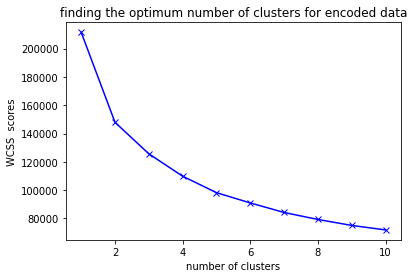

In [42]:
plt.plot(K, wcss2, 'bx-')
plt.title("finding the optimum number of clusters for encoded data")
plt.xlabel("number of clusters")
plt.ylabel("WCSS  scores")
plt.show()

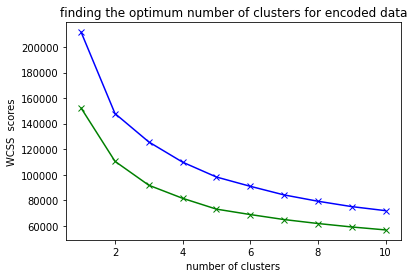

In [43]:
plt.plot(K, wcss, 'gx-')
plt.plot(K, wcss2, 'bx-')
plt.title("finding the optimum number of clusters for encoded data")
plt.xlabel("number of clusters")
plt.ylabel("WCSS  scores")
plt.show()

In [44]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(customers_encode)
labels2 = kmeans2.labels_

In [45]:
pca2 = PCA(n_components=2)
principal_comp2 = pca2.fit_transform(customers_encode)
principal_comp2

array([[-0.26595247, -0.6751903 ],
       [-0.1828047 ,  2.9810586 ],
       [-1.2115655 , -1.2645389 ],
       ...,
       [ 2.6026025 , -2.1165757 ],
       [ 3.7517123 ,  1.8421665 ],
       [ 9.637567  ,  0.22298506]], dtype=float32)

In [46]:
principal_comp2_df = pd.DataFrame(data=principal_comp2, columns=['pc1', 'pc2'])
pc_cluster_df2 = pd.concat([principal_comp2_df, pd.DataFrame({'clusters': labels2})], axis=1)

[Text(0.5, 0, 'Principal Component 1'), Text(0, 0.5, 'Principal Component 2')]

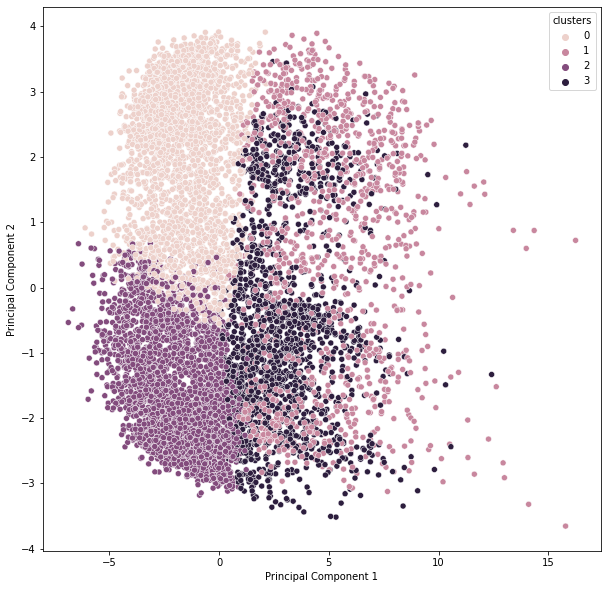

In [47]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(data=pc_cluster_df2, x='pc1', y='pc2', hue='clusters')
ax.set(xlabel="Principal Component 1", ylabel="Principal Component 2")